In [17]:
import dataset
import functools
import itertools
import pandas as pd
import sklearn
import pandas as pd
import joblib
import torch
import value_functions
import os.path
import constants
import neural_networks
import loss_functions
import recommenders
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import time
import dataset
import utils


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import time
plt.style.reload_library()
plt.style.use(['science','notebook'])
plt.rcParams['figure.figsize'] = [12/2, 8/2]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [37]:
train_df, test_df, attributes_df, user_int_ids, product_int_ids = dataset.farfetch_train_test_normalization(
    # dataset.parquet_load(file_name=f'data_phase1/train.parquet'),
    dataset.parquet_load(file_name='data_phase1/train.parquet'),
    # dataset.parquet_load(file_name='data_phase1/validation.parquet'),
    dataset.parquet_load(file_name='data_phase1/validation.parquet'),
    dataset.parquet_load(file_name='data_phase1/attributes.parquet'))

In [2]:
attributes_df = dataset.parquet_load(file_name='data_phase1/attributes.parquet')

In [3]:
attributes_df.head()

,product_id,gender,main_colour,second_colour,season,collection,category_id_l1,category_id_l2,category_id_l3,brand_id,season_year,start_online_date,material_values,attribute_values
0,0013f07ccdf212210c110e63f0de46e37669c17a4d855a...,a8c9cca4c116691f1e331a5058e84f05e31696bc4f611c...,7673fc4fdc325f3785a223787d2b32e381e8b4c1c8a765...,4737cd35940c2338e96c18a25aeb6848d46f0da795bce8...,847a067597e39838f1f85b0774f44e68b4d6e64d3ec4dd...,a3791e8d85c005b0d9d60d6d3b7e8edd2f256a5cc928d0...,abf367e49718254e068eee51a565fdcede2d741e4c7e33...,61fe255948ec07c4eb25c70f7144b54beddd00466ad866...,05f872d8b8ec85642ad49786d6e443c0df6e7df4bdcba3...,dd6ea8954a945ef0889f30d57b7fdb8d6aaad397e6c6ff...,c7c4ac6af030e54d02b9e4545e4223e76515c3ce4e498e...,1067.041667,f61ecea9b45f1590e57706b88207449bdd4cb703b917ad...,8b45c5d5e010acf257787f2ce0c505857d94709c436991...
1,002239cd57f19f22e557030dff363dfbd1344d8f7ac829...,4a00d8b84bdb2ec2f219304d3883a46336f9fb38d2f1e6...,0f97dafafa5dc4bb18853ea00776dfcc52302f40411b50...,ca8c396e7422e324d4454a911e0319d07b85a4fb89b006...,9db35d237f5873f0410d3ca18c07430270086eb1e7838d...,a3791e8d85c005b0d9d60d6d3b7e8edd2f256a5cc928d0...,e54f8513b708db3afdbd4950bd3420579a8cddabf4c1b3...,3809cade495cd7dc289e6aee521d380549ebd3456f03bc...,fd021cd2dbaf0d7b6105a1b136cf5a094e025010a2096f...,a6536c6bc250d525ccd3b63a3ec483a33a2010422932a3...,ef7d8d2e02aec8c328dafde95486f7181c37d07be3d167...,215.041667,1675f293342bbb518ba3a5ad39399aa0a13580653d253e...,ca8c396e7422e324d4454a911e0319d07b85a4fb89b006...
2,0028022e1ecbbf92f03a1edb9accb58e7c682e7cd89897...,a8c9cca4c116691f1e331a5058e84f05e31696bc4f611c...,0f97dafafa5dc4bb18853ea00776dfcc52302f40411b50...,ca8c396e7422e324d4454a911e0319d07b85a4fb89b006...,9db35d237f5873f0410d3ca18c07430270086eb1e7838d...,4c8006c7e513057a9138641abc2a9e65f4b014a8045259...,bb660069187af9e9238d10a742def09bf2bed60435b088...,8d4b33036479822fc696f32e1252b16e5105b91b82d564...,ca8c396e7422e324d4454a911e0319d07b85a4fb89b006...,c9c2f76b2ae7911c95e1b9568a614c14bd0eebc750cade...,dc1194ba428d5cd4c49f8a769a6577ac1042162da38bc1...,519.000000,5254281b3c0b606d2c56ae1747cf0b0a868053cc3246d2...,ca8c396e7422e324d4454a911e0319d07b85a4fb89b006...
3,00433de93d9cb6b08584423a6b54306abacef89fbddffe...,a8c9cca4c116691f1e331a5058e84f05e31696bc4f611c...,9a446cf5272a0694254db28c796c058405fc9caeb6352f...,ca8c396e7422e324d4454a911e0319d07b85a4fb89b006...,9db35d237f5873f0410d3ca18c07430270086eb1e7838d...,a3791e8d85c005b0d9d60d6d3b7e8edd2f256a5cc928d0...,abf367e49718254e068eee51a565fdcede2d741e4c7e33...,c71ada9c30cd0210a4bdd2d54172dc7be4f07c9ffdbaa3...,f9226009034d0eecc774be42fbe07e9cdcf9ca5dd24fb5...,2f85e4e89f3d731a3fcc43c1ea068600dc082d9b2656de...,ef7d8d2e02aec8c328dafde95486f7181c37d07be3d167...,202.041667,2a9ca66cf16c629b4d0fb6d78e988a199db1490ef21d78...,ca8c396e7422e324d4454a911e0319d07b85a4fb89b006...
4,009623ea17e53324f8f5a3f45f5b21b9a885ea2765de82...,a8c9cca4c116691f1e331a5058e84f05e31696bc4f611c...,68b6499cff2b4a31b0927effd65c194c69c24954fcb80b...,ca8c396e7422e324d4454a911e0319d07b85a4fb89b006...,9db35d237f5873f0410d3ca18c07430270086eb1e7838d...,b5beb2ed60981746e0b908797b3d3abb8491de15ff5575...,abf367e49718254e068eee51a565fdcede2d741e4c7e33...,c71ada9c30cd0210a4bdd2d54172dc7be4f07c9ffdbaa3...,162f8b725de80863b3ced87304a2922fe3d1bd1f25562f...,668b3eeef29561fa9dd4da956ca3eb2787b2d8df515eed...,ef7d8d2e02aec8c328dafde95486f7181c37d07be3d167...,211.041667,d276da9d2047f312bb486b3b59a646f046d72bc3cf2e19...,ca8c396e7422e324d4454a911e0319d07b85a4fb89b006...


In [4]:
train_df = dataset.parquet_load(file_name='data_phase1/train.parquet')

In [5]:
validation_df = dataset.parquet_load(file_name='data_phase1/validation.parquet')

In [6]:
full_df = pd.concat([train_df.drop('is_click',axis=1),validation_df],axis=0)

In [7]:
full_df.shape

(4195182, 15)

<AxesSubplot:xlabel='week'>

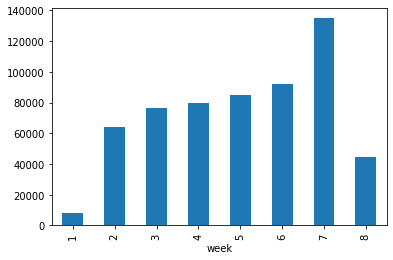

In [14]:
# fig, ax =plt.subplots()

train_df.groupby(['week'])['query_id'].nunique().plot(kind="bar")

In [64]:
# x = train_df[train_df.is_click>0].groupby('product_id')['user_id'].nunique().sort_values(ascending=False)
items_popularity = np.zeros(len(attributes_df.product_id))
# items_popularity = np.zeros(len(dataset['items_attributes']))
for user_id, product_id in train_df[train_df.is_click>0].groupby(['user_id','product_id']).count().reset_index()[['user_id','product_id']].iterrows():
#     print(user_id,product_id)
#     break
#     print(
    items_popularity[product_id['product_id']] +=1
#     print(items_popularity[product_id])

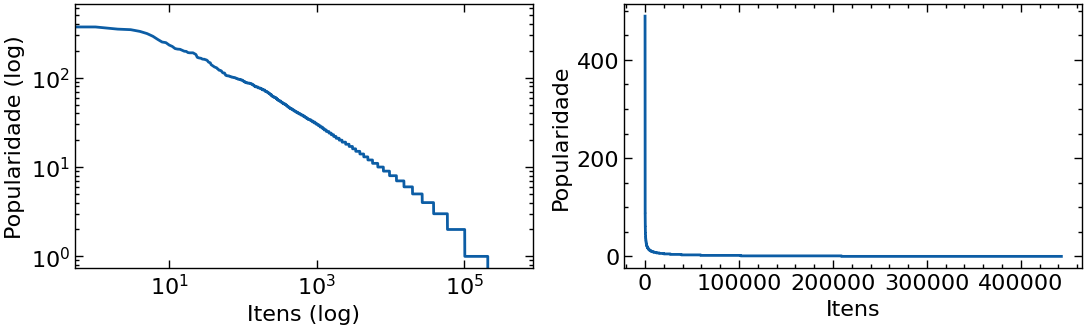

In [65]:
fig, axs = plt.subplots(ncols=2,figsize=(13,3.5))
ax = axs[0]
ax.plot(np.sort(items_popularity)[::-1])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Popularidade (log)')
ax.set_xlabel('Itens (log)')
ax = axs[1]
ax.plot(np.sort(items_popularity)[::-1])
# ax.plot(train_df[train_df.is_click>0].groupby('product_id')['user_id'].nunique().sort_values(ascending=False).to_numpy())
ax.set_ylabel('Popularidade')
ax.set_xlabel('Itens')
plt.show()
fig.savefig('items_pop.eps',bbox_inches='tight')

1      163423
2       24948
3        8709
4        4053
5        2192
        ...  
55          1
43          1
53          1
45          1
376         1
Name: session_id, Length: 68, dtype: int64

In [68]:
# x = train_df[train_df.is_click>0].groupby('product_id')['user_id'].nunique().sort_values(ascending=False)
items_popularity = np.zeros(len(user_int_ids))
# items_popularity = np.zeros(len(dataset['items_attributes']))
for user_id, product_id in train_df[train_df.is_click>0].groupby(['user_id','product_id']).count().reset_index()[['user_id','product_id']].iterrows():
#     print(user_id,product_id)
#     break
#     print(
    items_popularity[product_id['user_id']] +=1
#     print(items_popularity[product_id])

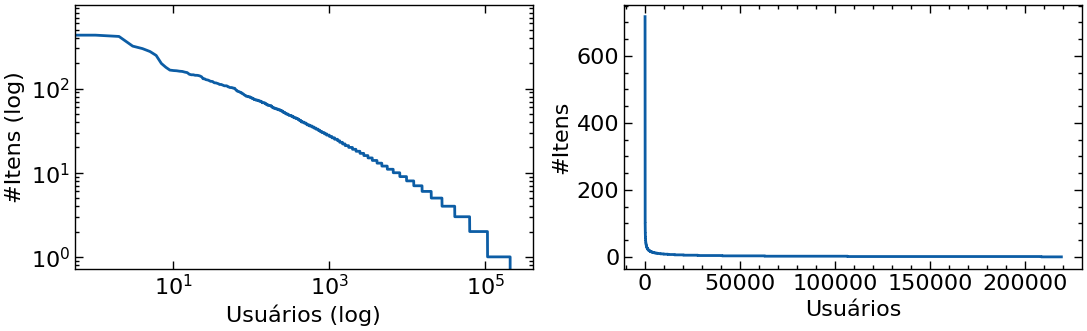

In [73]:
fig, axs = plt.subplots(ncols=2,figsize=(13,3.5))
ax = axs[0]
ax.plot(np.sort(items_popularity)[::-1])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('#Itens (log)')
ax.set_xlabel('Usuários (log)')
ax = axs[1]
ax.plot(np.sort(items_popularity)[::-1])
# ax.plot(train_df[train_df.is_click>0].groupby('product_id')['user_id'].nunique().sort_values(ascending=False).to_numpy())
ax.set_ylabel('#Itens')
ax.set_xlabel('Usuários')
plt.show()
fig.savefig('users_clicks.eps',bbox_inches='tight')

In [94]:
x=train_df[train_df.is_click==1].groupby(['user_id','product_id'])['is_click'].sum().value_counts().sort_index()
print((100*x/x.sum()).to_latex())

\begin{tabular}{lr}
\toprule
{} &   is\_click \\
\midrule
1  &  96.888511 \\
2  &   2.728706 \\
3  &   0.293456 \\
4  &   0.058175 \\
5  &   0.018416 \\
6  &   0.006712 \\
7  &   0.002754 \\
8  &   0.001377 \\
9  &   0.000516 \\
10 &   0.001205 \\
11 &   0.000172 \\
\bottomrule
\end{tabular}



In [85]:
len(set(test_df.user_id) - set(train_df.user_id))/len(set(test_df.user_id))

0.09291726329759369

In [86]:
len(set(test_df.product_id) - set(train_df.product_id))/len(set(test_df.product_id))

0.07115890630362659

<AxesSubplot:>

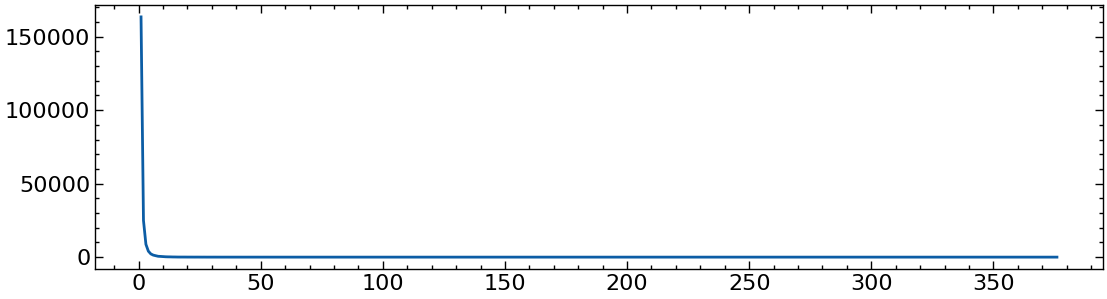

In [78]:
# fig, axs = plt.subplots(figsize=(13,3.5))
sessions = train_df.groupby('user_id')['session_id'].nunique().value_counts().sort_index()

fig, axs = plt.subplots(ncols=2,figsize=(13,3.5))
ax = axs[0]
ax.plot(np.sort(items_popularity)[::-1])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('#Sessões (log)')
ax.set_xlabel('Usuários (log)')
ax = axs[1]
ax.plot(np.sort(items_popularity)[::-1])
# ax.plot(train_df[train_df.is_click>0].groupby('product_id')['user_id'].nunique().sort_values(ascending=False).to_numpy())
ax.set_ylabel('#Sessões')
ax.set_xlabel('Usuários')
plt.show()
fig.savefig('users_clicks.eps',bbox_inches='tight')

In [30]:
full_df.user_id.nunique()

219035

In [31]:
attributes_df.product_id.nunique()

443150

In [37]:
full_df.groupby(['user_id','product_id']).count().reset_index()

,user_id,product_id,query_id,session_id,page_type,previous_page_type,device_category,device_platform,user_tier,user_country,context_type,context_value,product_price,week,week_day
0,00001039003fd7fbc902f30fb6d78eaa5176f7291cba9a...,0b0d67508922c1b432da6a1fe2b8b8c72683377261fad3...,1,1,1,1,1,1,1,1,1,1,1,1,1
1,00001039003fd7fbc902f30fb6d78eaa5176f7291cba9a...,44a7b3bb43e83abf52cea0b135fc4c3de18c886a824153...,1,1,1,1,1,1,1,1,1,1,1,1,1
2,00001039003fd7fbc902f30fb6d78eaa5176f7291cba9a...,64b7cefa7dbb755dff8e8fcc4c6ff27ea523e8283a68a7...,1,1,1,1,1,1,1,1,1,1,1,1,1
3,00001039003fd7fbc902f30fb6d78eaa5176f7291cba9a...,7597faf176da2c707e851268dc2105308c7ba90de29bc5...,1,1,1,1,1,1,1,1,1,1,1,1,1
4,00001039003fd7fbc902f30fb6d78eaa5176f7291cba9a...,8727783c30c14163b1dd234b83448b48b279acc6a2737e...,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3155549,ffffe92e2e357aede270f1bd0b34ca705be6520c923d26...,44c56145e80356e3b8f0f8e0c30c7d26cfbcba4cf2f3dc...,1,1,1,1,1,1,1,1,1,1,1,1,1
3155550,ffffe92e2e357aede270f1bd0b34ca705be6520c923d26...,7f3b0fbbf2fb0ef7fd2692f66521ac40311c3fd93a2c3d...,1,1,1,1,1,1,1,1,1,1,1,1,1
3155551,ffffe92e2e357aede270f1bd0b34ca705be6520c923d26...,8492de852bf4edf6e4ddc4f64016b0ec610348a1f5901a...,1,1,1,1,1,1,1,1,1,1,1,1,1
3155552,ffffe92e2e357aede270f1bd0b34ca705be6520c923d26...,98839d990171d0a0becd3019d8aa94080676794fa6a226...,1,1,1,1,1,1,1,1,1,1,1,1,1


In [40]:
(1-3155554/(443150*219035))*100

99.99674904209712

In [12]:
# x=set(full_df.columns) - set(['product_price','query_id','user_id','item_id','product_id','session_id'])

In [31]:
train_df.context_type.loc[train_df['context_type'].isna()] = 'NULL'

In [34]:
for i in train_df.columns:
#     if i:
#         print(i)
    print(f'{i}\t',end='')
    y= [ii for jj in train_df[i].map(lambda x: [x] if isinstance(x,(int,float)) else x.split(',')).to_list() for ii in jj]
    y=set(y)
    print(len(y))
#     print(f'{len(full_df[i].str.get_dummies(",").columns)}')

query_id	584665
user_id	208393
session_id	317426
product_id	408263
page_type	5
previous_page_type	23
device_category	3
device_platform	2
user_tier	6
user_country	196
context_type	4
context_value	187906
product_price	1757598
week	8
week_day	7
is_click	2


In [35]:
for i in attributes_df.columns:
#     if i:
#         print(i)
    print(f'{i}\t',end='')
    y= [ii for jj in attributes_df[i].map(lambda x: [x] if isinstance(x,(int,float)) else x.split(',')).to_list() for ii in jj]
    y=set(y)
    print(len(y))
#     print(f'{len(full_df[i].str.get_dummies(",").columns)}')

product_id	443150
gender	4
main_colour	17
second_colour	22
season	7
collection	9
category_id_l1	43
category_id_l2	394
category_id_l3	583
brand_id	3399
season_year	20
start_online_date	2150
material_values	859
attribute_values	129


In [10]:
train_df.head()['context_value'].iloc[3]

'c739fd56b5999e40d7391008230454adb1e371d30c6973f277063215fea3766c'

In [13]:
attributes_df.isna().sum()

product_id           0
gender               0
main_colour          0
second_colour        0
season               0
collection           0
category_id_l1       0
category_id_l2       0
category_id_l3       0
brand_id             0
season_year          0
start_online_date    0
material_values      0
attribute_values     0
dtype: int64

In [16]:
train_df.isna().sum()/len(train_df)

query_id              0.000000
user_id               0.000000
session_id            0.000000
product_id            0.000000
page_type             0.000000
previous_page_type    0.000000
device_category       0.000000
device_platform       0.000000
user_tier             0.000000
user_country          0.000000
context_type          0.043476
context_value         0.000000
product_price         0.000000
week                  0.000000
week_day              0.000000
is_click              0.000000
dtype: float64

In [5]:
attributes_df.nunique()

product_id           443150
gender                    4
main_colour              17
second_colour            22
season                    7
collection                9
category_id_l1           43
category_id_l2          394
category_id_l3          583
brand_id               3399
season_year              20
start_online_date      2150
material_values       49480
attribute_values       1469
dtype: int64

In [6]:
def comma_split(df):
    res = df.map(lambda x:x.split(','))
    return res
def flat_series(series):
    res = list(series.values)
    res = pd.Series(list(itertools.chain(*res)))
    return res

In [7]:
t1 = comma_split(attributes_df['attribute_values'])
t2 = flat_series(t1)


In [8]:
t2.nunique()

129

In [9]:
t1 = comma_split(attributes_df['material_values'])
t2 = flat_series(t1)


In [10]:
t2.nunique()

859

In [11]:
attributes_df.columns

Index(['product_id', 'gender', 'main_colour', 'second_colour', 'season',
       'collection', 'category_id_l1', 'category_id_l2', 'category_id_l3',
       'brand_id', 'season_year', 'start_online_date', 'material_values',
       'attribute_values'],
      dtype='object')

In [12]:
columns_to_dummies =['attribute_values', 'material_values','gender', 'main_colour', 'second_colour', 'season',
       'collection', 'category_id_l1', 'category_id_l2', 'category_id_l3',
       'brand_id', 'season_year']
tdf = attributes_df.copy()
for column in columns_to_dummies:
    if column in ['material_values','attribute_values']:
        tdf = pd.concat([tdf,attributes_df[column].str.get_dummies(',')],axis=1)
    else:
        tdf = pd.concat([tdf,pd.get_dummies(attributes_df[column])],axis=1)
    del tdf[column]
tdf.head()

,product_id,start_online_date,0047d43bec0f045606c528b53d2fbfa71ee50ce992d9ec65a7fa7c48a4201682,0062ec2fe57440ca66ccd557c1316262f4664753e0afb1541a1b63dad6c058c7,00c7872f916c8a3bd487ef61c9750c86f1fb9b00eaa60057a950a0e3b94800e3,00d385cbedfaef819c8ade4727b905d0448be170b0b716c01de95ef7aaae6d7b,00f5bba802966e59f9236357ee303fbaa929729e03891b343ccf6af17493fae9,01a322d7c0e5e94b28ed07c61be3392a32a270b0321a108ad2356e8de39a944f,02019e45e45692e94bba2acae484f1b0457d34c2274291c57f47b4870385623a,02ca686bb791441f7d314711b7aec3426bc4d86c0ec9c09649df0cb397cd4081,...,84f159b4fc13c65fe457522e8274c99ad41b0a0b4dac960a02d955cc407d3048,8eb8effcf521a262349220ff9e4f225fd08f8296517447114e9ecdf330aa2cc1,9aafdb0570382a9b2ed3b1ac9bf45d433074bc8330a6d9cf8de64d2b2cbfe30d,c7c4ac6af030e54d02b9e4545e4223e76515c3ce4e498eb16dbe9be7a6292a9e,da0ff57eff378aa194c6ee3ccaf426d85d4cb189471c6dfd6752149ad137cb7f,dc1194ba428d5cd4c49f8a769a6577ac1042162da38bc16f56c9c23ac198d5d5,e2fab5efe53ffede664e134836a9348c387358f1fcfebc0621708078e3eb9e36,eb9b486f01241b752dfc53cf487bf05abcbbb08f345a7eab4e6637c1824150cd,ed3084b866a18cd05e10ad23b85f78597ee574ebbe373b740e21295870af91bc,ef7d8d2e02aec8c328dafde95486f7181c37d07be3d167dc22af62e47b8dc610
0,0013f07ccdf212210c110e63f0de46e37669c17a4d855a...,1067.041667,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,002239cd57f19f22e557030dff363dfbd1344d8f7ac829...,215.041667,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0028022e1ecbbf92f03a1edb9accb58e7c682e7cd89897...,519.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,00433de93d9cb6b08584423a6b54306abacef89fbddffe...,202.041667,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,009623ea17e53324f8f5a3f45f5b21b9a885ea2765de82...,211.041667,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
train_df = dataset.parquet_load(file_name='data_phase1/train.parquet')

In [16]:
train_df.columns

Index(['query_id', 'user_id', 'session_id', 'product_id', 'page_type',
       'previous_page_type', 'device_category', 'device_platform', 'user_tier',
       'user_country', 'context_type', 'context_value', 'product_price',
       'week', 'week_day', 'is_click'],
      dtype='object')

In [36]:
t1 = comma_split(train_df['context_value'])
t2 = flat_series(t1)
t2.nunique()

187906

In [32]:
columns_to_dummies =['context_type', 'context_value','page_type',
       'previous_page_type', 'device_category', 'device_platform', 'user_tier',
       'user_country', 'week', 'week_day',]
ntraindf = train_df.copy()
for column in columns_to_dummies:
    print(column)
    if column in ['context_type', 'context_value']:
#         column_values = ntraindf[column].map(lambda x: x if x == None else x.split(','))
#         unique_values = column_values.explode().unique()
#         int_mapping = {uv: str(i) for i, uv in enumerate(unique_values)}
#         column_values = column_values.map(lambda x: x if x == None else list(map(lambda y: int_mapping[y],x))).map(lambda x: x if x==None else ','.join(x))
        ntraindf = pd.concat([ntraindf,ntraindf[column].str.get_dummies(',')],axis=1)
    else:
        ntraindf = pd.concat([ntraindf,pd.get_dummies(ntraindf[column])],axis=1)
    del ntraindf[column]
ntraindf.head()

context_type
context_value


MemoryError: Unable to allocate 4.80 TiB for an array with shape (3507990, 187906) and data type int64

In [3]:
train_normalized_df, test_normalized_df, attributes_df, user_int_ids, product_int_ids = dataset.farfetch_train_test_normalization(
    dataset.parquet_load(file_name=f'data_phase1/train.parquet'),
    # dataset.parquet_load(file_name=f'data_phase1/data/train_one_split.parquet'),
    dataset.parquet_load(file_name='data_phase1/validation.parquet'),
    # dataset.parquet_load(file_name='data_phase1/data/test_one_split.parquet'),
    dataset.parquet_load(file_name='data_phase1/attributes.parquet'))



num_users = len(user_int_ids)
num_items = len(product_int_ids)
total_observations = len(train_normalized_df)

print('Num users: {} Num items: {} Num user-item pair unique observations: {}'.format(num_users, num_items,total_observations))
print('Train Sparsity: {:.7%}'.format(1-total_observations/(num_users*num_items)))
print('Users unique items clicked {}'.format(len(train_normalized_df.product_id.unique())))

train_df = dataset.parquet_load(file_name=f'data_phase1/train.parquet')
print('number of sessions per user count')
print(train_df.groupby('user_id')['session_id'].nunique().value_counts())
print('number of queries per user count')
print(train_df.groupby('user_id')['query_id'].nunique().value_counts())
# print('Users unique items consumed {}'.format())
print(train_df.describe())


print(train_df[['page_type','previous_page_type','device_category','device_platform','user_tier','user_country','context_type','context_value']].nunique())

print(train_df['context_type'].unique())

Num users: 219035 Num items: 443150 Num user-item pair unique observations: 3507990
Train Sparsity: 99.9963860%
Users unique items clicked 408263
number of sessions per user count
1      163423
2       24948
3        8709
4        4053
5        2192
        ...  
55          1
43          1
53          1
45          1
376         1
Name: session_id, Length: 68, dtype: int64
number of queries per user count
1      103095
2       42970
3       21847
4       12408
5        7498
        ...  
167         1
130         1
206         1
343         1
126         1
Name: query_id, Length: 139, dtype: int64
       product_price          week      week_day      is_click
count   3.507990e+06  3.507990e+06  3.507990e+06  3.507990e+06
mean    1.691022e-03  5.065429e+00  2.941093e+00  1.716533e-01
std     1.245486e-02  1.901958e+00  1.988291e+00  3.770789e-01
min     0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%     3.295741e-04  3.000000e+00  1.000000e+00  0.000000e+00
50%     6.202834

In [20]:
train_df.user_id.iloc[0]

'e5e4c71b1b9456dafece1338762d4ee3db698cf32c384c7f95cd5657bdb417c6'